In [1]:
import torch
from torch.utils.data import DataLoader
from torchvision import transforms, datasets
from torchvision.models import resnet18
import torch.nn as nn
import torch.optim as optim
import numpy as np
from utils import Rescale, train_model, visualize_train_cycle, visualize_model, CNNModelCustomSet, CNNModelFontsSet
from matplotlib import pyplot as plt

In [2]:
dataset_custom = datasets.ImageFolder(root='./markup/augmentation/', transform=transforms.Compose([Rescale((18, 28)), transforms.Grayscale(1), transforms.ToTensor(), transforms.Normalize(0.5, 0.5)]))
dataset_images = datasets.ImageFolder(root='./fonts_dataset/Images/Images/', transform=transforms.Compose([transforms.Grayscale(1), transforms.ToTensor(), transforms.Normalize(0.5, 0.5)]))

In [3]:
train_cnt_custom = int(len(dataset_custom) * 0.9)
val_cnt_custom = len(dataset_custom) - train_cnt_custom

train_cnt_images = int(len(dataset_images) * 0.9)
val_cnt_images = len(dataset_images) - train_cnt_images

print('Train samples count for Custom dataset = ', train_cnt_custom)
print('Validation samples count for Custom dataset = ', val_cnt_custom)

print('Train samples count for Images dataset = ', train_cnt_images)
print('Validation samples count for Images dataset = ', val_cnt_images)


train_set_custom, val_set_custom = torch.utils.data.random_split(dataset_custom, [train_cnt_custom, val_cnt_custom])
train_set_images, val_set_images = torch.utils.data.random_split(dataset_images, [train_cnt_images, val_cnt_images])

train_loader_custom = DataLoader(train_set_custom, batch_size=50, shuffle=True, num_workers=8)
val_loader_custom = DataLoader(val_set_custom, batch_size=50, shuffle=True, num_workers=8)

train_loader_images = DataLoader(train_set_images, batch_size=900, shuffle=True, num_workers=8)
val_loader_images = DataLoader(val_set_images, batch_size=900, shuffle=True, num_workers=8)

Train samples count for Custom dataset =  336
Validation samples count for Custom dataset =  38
Train samples count for Images dataset =  350788
Validation samples count for Images dataset =  38977


In [9]:
dataloaders_custom = {'train': train_loader_custom, 'val': val_loader_custom}
dataloaders_images = {'train': train_loader_images, 'val': val_loader_images}

In [22]:
print(dataloaders_images['train'])

In [24]:
import torchvision

IndexError: index 6 is out of bounds for axis 0 with size 6

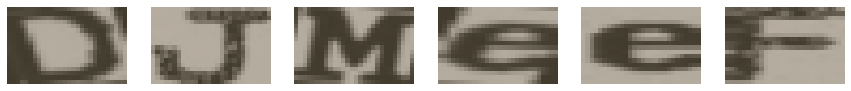

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
test_set = datasets.ImageFolder(root='./markup/augmentation/', transform=transforms.Compose([Rescale((18,28)), transforms.Grayscale(1), transforms.ToTensor(), transforms.Normalize(0.5, 0.5)]))

images_so_far = 0
test_loader = DataLoader(test_set, batch_size=10, shuffle=True, num_workers=8)
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q',
           'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
chart, axes = plt.subplots(1, 6, figsize=(15, 10))
with torch.no_grad():
    for i, (inputs, labels) in enumerate(test_loader):
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        for j in range(0,6):
                inp = inputs.cpu().data[j]
                inp = inp.numpy().transpose((1, 2, 0))
                mean = np.array([0.485, 0.456, 0.406])
                std = np.array([0.229, 0.224, 0.225])
                inp = std * inp + mean
                inp = np.clip(inp, 0, 1)
                axes[images_so_far].imshow(inp)
                axes[images_so_far].axis('off')
                
                images_so_far += 1
        plt.savefig('images_dataset.png', bbox_inches='tight', pad_inches=0.1)